In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Linear fit
# fit a0 + a1*x = y, with analytical method
def linear_fit_analytical(xs, ys, sigmas, xlabel='x', ylabel='y(x)'):
    cm = 1.06
    x=xs
    y=ys
    sig = sigmas
    w = 1/sig**2
    # normalmatrix 2x2
    N = np.zeros((2,2))
    N[0,0] = np.sum(w)
    N[0,1] = np.sum(w * x)
    N[1,0] = np.sum(w * x)
    N[1,1] = np.sum(w * x**2)
    # solution vector
    Y = np.zeros((2,1))
    Y[0] = np.sum(w * y)
    Y[1] = np.sum(w * x * y)
    # mit der Lösung
    a = np.linalg.inv(N)@Y
    # A@B is a shorthand for np.dot(A,B) and retuns the matrix product, while A*B attempts elementwise multiplication
    print("solution vector:")
    print(a)
    # und der Covarianz-Matrix
    C = np.linalg.inv(N)
    print("Covarianz Matrix:")
    print(C)
    a0_error = np.sqrt(C[0,0])
    a1_error = np.sqrt(C[1,1])
    print('b = ', '%.5f' % a[0])
    print('a = ', '%.5f' % a[1])
    print('b_error = ', '%.5f' % a0_error)
    print('a_error = ', '%.5f' % a1_error)

    return a[0], a[1], a0_error, a1_error

def to_scientific_notation(number):
    return "{:.4e}".format(number)
    return '{:.5f}E{:+03d}'.format(float(a)/10, int(b)+1)


dm/dI =  0.00076
sigma_prop_I =  3.04e-06
15g =  1.5e-05 sigma_m =  1.804e-05
solution vector:
[[-2.50209309e-12]
 [ 7.57298705e-04]]
Covarianz Matrix:
[[ 9.99999342e-17 -1.42857049e-16]
 [-1.42857049e-16  8.45304898e-11]]
b =  -0.00000
a =  0.00076
b_error =  0.00000
a_error =  0.00001


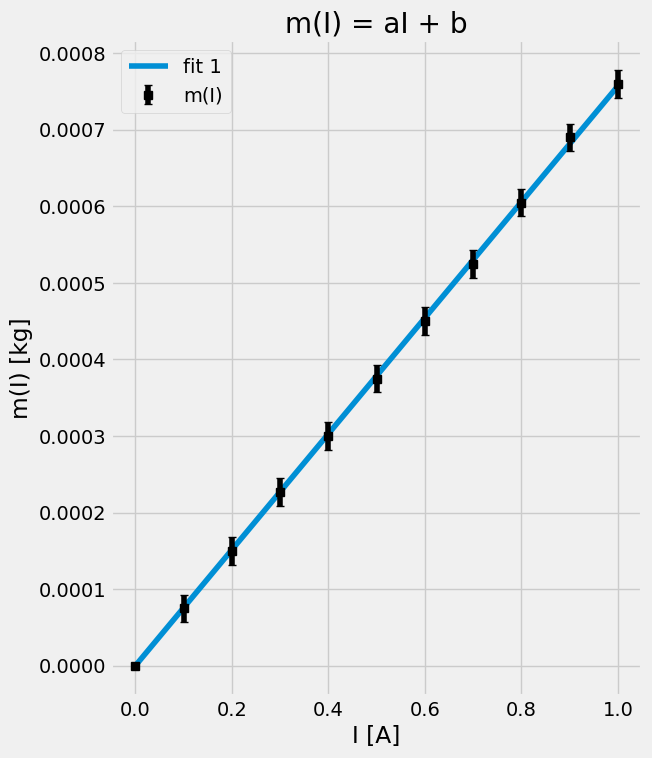

H solution 1 = 3.031e+05 += 3.679e+03
H array:  [300149.38881202 300149.38881202 302817.38337923 300149.38881202
 300149.38881202 300149.38881202 300149.38881202 302650.63371878
 306819.37523006 304151.38066284]
H solution 2 = 3.017e+05 += 2.209e+03


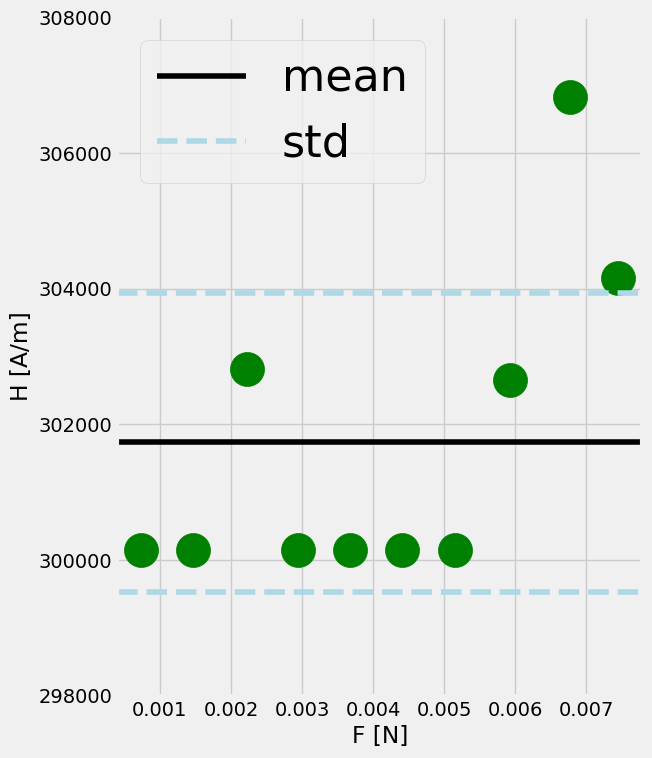

H FINAL SOLUTION = 3.024e+05 += 4.291e+03


In [110]:
using_kg=True

filename_FA = os.path.join(os.getcwd(), "I_m.csv")
I_ampere_arr, m_mg_arr = np.genfromtxt(filename_FA, delimiter=',', skip_header=1, unpack=True)
m_kg_arr = m_mg_arr/(1000*1000)
# Appending (0,0) because that should be a solution.
I, m = np.append(np.zeros(1), I_ampere_arr), np.append(np.zeros(1), m_kg_arr if using_kg else m_mg_arr)

# WE CALCULATE H in 2 ways:
H_solutions = np.zeros(2)
H_solutions_error_values = np.zeros(2)

### FIRST WAY: CALCULATING THE SLOPE OF M(I) AND GETTING H THAT WAY

# Error Calculation
sigma_I = 0.004 # Error of measurement and random fluctuations
dm_dI=m[-1]/I[-1] # dm/dI will be approximately the biggest m divided by the biggest I
print("dm/dI = ", dm_dI)
sigma_prop_I = np.sqrt((sigma_I**2) * (dm_dI**2)) # https://en.wikipedia.org/wiki/Propagation_of_uncertainty
print("sigma_prop_I = ", sigma_prop_I)
sigma_m = 15/(1000000 if using_kg else 1) + sigma_prop_I # 15mg of error due to oscillations of the scale + propagation of uncertainty of I
print("15g = ", 15/(1000000 if using_kg else 1), "sigma_m = ", sigma_m)
sigmas = np.ones(len(m))*sigma_m
assert(I[0] < 0.001 and I[0] > -0.001 and m[0] < 0.001 and m[0] > -0.001)
sigmas[0] = 0.00000001 # The point (0,0) has much much less error than the others because we know it is a solution

# Fit
b, a, b_err, a_err = linear_fit_analytical(I, m, sigmas)

# Plot
plt.style.use('fivethirtyeight')
ylabel, yunit='m(I)', 'kg' if using_kg else 'mg'
xlabel, xunit ='I', 'A'
cm = 1.06
fig, ax = plt.subplots(1,1,figsize=(6*cm, 7*cm))
# Plot the fit of all
ax.plot(I, b + a*I, label='fit 1') #('a=%.4f±%.4f, b=%.4f±%.4f' % (a,a_err,b,b_err)))
ax.errorbar(I, m, yerr=sigmas, marker='s', linestyle='', capsize=3, label=ylabel, color='black')
ax.set_title('%s = a%s + b' % (ylabel, xlabel))
#ax.set_title('%s = a%s + b \n $a=%.3e (± %.3e)$ \n $b=%.3e ± %.3e$' % (ylabel, xlabel,a,a_err,b,b_err))
ax.set_xlabel('%s [%s]' % (xlabel, xunit))
ax.set_ylabel('%s [%s]' % (ylabel, yunit))
ax.legend(loc='upper left')
fig.tight_layout(pad=0.1)
plt.savefig('I_m.png')
plt.show()

# Calculating H as function of a
assert(using_kg)
g = 9.80665
l = 1.95/100.0
mu_0 = 1.25663706212*np.power(10.,-6)
H_solutions[0] = a*g/(mu_0*l)
dH_da = g/(mu_0*l)
H_solutions_error_values[0] = np.sqrt((a_err**2)*(dH_da**2))
print("H solution 1 = %.3e += %.3e" % (H_solutions[0], H_solutions_error_values[0]))

### SECOND WAY: CALCULATING EACH H VALUE AND GETTING THE MEAN
## Also calculating individual H values and errors and taking the mean to see if it leads to a similar result:
H_arr = np.divide(m[1:] * dH_da, I[1:]) # first I value is 0 so we dont calculate it for the point 0,0
print("H array: ", H_arr)
H_solutions[1] = np.mean(H_arr)
H_solutions_error_values[1] = np.std(H_arr)
print("H solution 2 = %.3e += %.3e" % (H_solutions[1], H_solutions_error_values[1]))

F_arr=m[1:]*g
I_arr = I[1:]

#H_sig_arr=[np.sqrt(np.square(F_sig_arr[i])*np.square(1/(mu_0*l*I_arr[i]))) for i in range(0, len(F_sig_arr))]

# make data:
np.random.seed(1)
#plt.style.use('_mpl-gallery')
# plot:
fig, ax = plt.subplots(1,1,figsize=(6*cm, 7*cm))
#ax.errorbar(F_arr, H_arr, np.zeros(len(F_arr)), fmt='o', linewidth=2, capsize=6)
ax.scatter(F_arr, H_arr, s=600, c='g')
ax.axhline(y=H_solutions[1], color='black', label='mean')
plt.axhline(y=H_solutions[1]-H_solutions_error_values[1], color='lightblue', linestyle='--', label='std')
plt.axhline(y=H_solutions[1]+H_solutions_error_values[1], color='lightblue', linestyle='--')
ax.legend(loc='upper left', fontsize=32)
ax.set_ylim([298000,308000])
#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))
ax.set_xlabel('%s [%s]' % ('F', 'N'))
ax.set_ylabel('%s [%s]' % ('H', 'A/m'))
fig.tight_layout(pad=0.1)
plt.savefig('F-Hplot.png')
plt.show()


## TAKING THE MEAN OF THE SOLUTIONS GIVES US THE FINAL SOLUTION
H_final_solution = np.mean(H_solutions)
H_final_solution_error = np.sqrt(np.sum(np.square(H_solutions_error_values)))
print("H FINAL SOLUTION = %.3e += %.3e" % (H_final_solution, H_final_solution_error))
